# Dynamic Simulation: The Basic Procedure
Once a set of dynamic mass balance equations has been formulated, they can be numerically solved, and thus the behavior of a network can be simulated in response to environmental and genetic changes. Simulation results can be obtained using a number of different software packages. Dynamic simulation generates the time dependent behavior of the concentrations, i.e., $\textbf{x}$(t). This solution can be obtained in response to several different types of perturbations and the results graphically displayed. The basic principles and procedures associated with dynamic simulation are covered in this chapter. The following three chapters then apply the simulation process to a set of simple but progressively more complex and relevant examples. 

## Numerical Solutions
Network dynamics are described by a set of ordinary differential equations (ODEs): the dynamic mass balance equations; see Eq. (1.1). To obtain the dynamic solutions, we need three things: first, the equations themselves; second, the numerical values for the kinetic constants that are in the equations; and third, the initial conditions and parameters that are being perturbed. We describe each briefly. 

**1.** To formulate the mass balances we have to specify the system boundary, the fluxes in and out of the system, and the reactions that take place in the network. From the set of reactions that are taking place, a stoichiometric matrix is formed. This matrix is then put into Eq. (1.1) . One can multiply out the individual dynamic mass balances, as was done in Eq. (2.13)  for the adenosine phosphate network, to prevent a large number of numerical operations that involve multiplication of reaction rates by the zero elements in $\textbf{S}$. The reaction rate laws for the reactions are then identified and substituted into the equations. Typically, one would use elementary kinetics as shown in Eq. (2.6), or apply more complex rate laws if they are appropriate and available. This process leads to the definition of the dynamic mass balances. 

**2.** The numerical values for the kinetic parameters in the rate laws have to be specified, as do any imposed fluxes across the system boundary. Obtaining numerical values for the kinetic constants is typically difficult. They are put into a parameter vector designated by $\textbf{k}$. In select cases, detailed kinetic characterization has been carried out. More often, though, one only knows these values approximately. It is important to make sure that all units are consistent throughout the equations and that the numerical values used are in the appropriate units. 

**3.** With the equations and numerical values for the kinetic constants specified $(\textbf{k})$, we can simulate the responses of the network that they represent. To do so, we have to set initial conditions $(x_0)$. This leads to the numerical solution of

$$\begin{equation} \frac{d\textbf{x}}{dt} = \textbf{Sv(x;k)},\ \textbf{x}(t = 0) = \textbf{x}_0 \tag{3.1} \end{equation}$$

There are three conditions that are typically considered. 

1. First, the initial conditions for the concentrations are set, and the motion of the network into a steady state (open system) or equilibrium (closed system) is simulated. This scenario is typically physiologically unrealistic since individual concentrations cannot simply change individually in a living cell.
2. Second, a change in an input flux is imposed on a network that is in a steady state. This scenario can be used to simulate the response of a cell to a change in its environment. 
3. Third, a change in a kinetic parameter is implemented at the initial time. The initial concentrations are typically set at the steady state values with the nominal value of the parameter. The equations are then simulated to a long time to obtain the steady state values that correspond to the altered kinetic parameters. These are set as the initial conditions when examining the responses of the system with the altered kinetic properties. 

**4.** Once the solution has been obtained it can be graphically displayed and the results analyzed. There are several ways to accomplish this step, as detailed in the next two sections. The analysis of the results can lead to post-processing of the output to form an alternative set of dynamic variables. 

The simulation is implemented using a numerical solver. Currently, such implementation is carried out using standard and readily available software, such as Mathematica or MATLAB. Specialized simulation packages are also available (Table 3.1). After the simulation is set up and the conditions specified, the software computes the concentrations as a function of time. The output is a file that contains the numerical values of the concentrations at a series of time points (Figure 3.1). This set of numbers is typically graphically displayed, and/or used for subsequent computations. 

**Table 3.1:** Available software for dynamic simulation. Assembled by Neema Jamshidi.

![Table-3-1](../images/Ch3/Table-3-1.png)

We will be using iPython notebooks using the python software package **MASSpy**  as our simulation software.

## Graphically Displaying the Solution
The simulation procedure described in the previous section results in a file that contains the concentrations as a function of time (Figure 3.1). These results are graphically displayed, typically in two ways: by plotting the concentrations as a function of time, or by plotting two concentrations against one another with time as a parameter along the trajectory. 

![Figure-3-1](../images/Ch3/Figure-3-1.png)

**Figure 3.1:** The fundamental structure of the file $\textbf{x}$(t) that results from a numerical simulation. The two vertical bars show the list of values that would be used to compute $\sigma_{12}$(2) (see Eq. 3.8); that is, the correlation between $x_1$ and $x_2$ with a time lag of 2.

Before describing these methods, we observe certain fundamental aspects of the equations that we are solving. The dynamic mass balances can be expanded as: 

$$\begin{equation} \frac{d\textbf{x}}{dt} = \textbf{Sv(x)} = \sum\textbf{s}_i v_i(\textbf{x}) \tag{3.2} \end{equation}$$

In other words, the time derivatives are linear combinations of the reaction vectors $(\textbf{s}_i)$ weighted by the reaction rates, that in turn change with the concentrations that are time varying. Thus, the motions are linear combinations of the directions specified by $\textbf{s}_i$. This characteristic is important because if the $v_i$. have different time constants, the motion can be decomposed in time along these reaction vectors. 

### Time Profiles
The simulation results in a file that contains the vector $\textbf{x}$(t) and the time points at which the numerical values for the concentrations are given. These time points can be specified by the user or are automatically generated by the solver used. Typically, the user specifies the initial time, the final time, and sometimes the time increment between the time points where the simulator stores the computed concentration values in the file. The results can then be graphically displayed depending on a few features of the solution. Some of these are shown in Figure 3.2 and are now briefly described: 

* Panel A: The most common way to display a dynamic solution is to plot the concentration as a function of time. 

* Panel B: If there are many concentration variables they are often displayed on the same graph. 

* Panel C: In many cases there are different response times and one plots multiple time profiles where the x-axis on each plot is scaled to a particular response time. Alternatively, one can use a logarithmic scale for time. 

* Panel D: If a variable moves on many time scales changing over many orders of magnitude, the y-axis is often displayed on a logarithmic scale. 

![Figure-3-2](../images/Ch3/Figure-3-2.png)

**Figure 3.2:** Graphing concentrations over time. (a) A single concentration shown as a function of time. (b) Many concentrations shown as a function of time. (c) A single concentration shown as a function of time separately on different time scales. (d) The logarithm of a single concentration shown as a function of time to distinguish the decay on different time scales.

The solution can thus be displayed in different ways depending on the characteristics of the time profiles. One normally plays with these representations to get an understanding of the responses of the network that they have formulated and to represent the features in which one is interested. 

### Dynamic phase portraits
Dynamic phase portraits represent trajectories formed when two concentrations plotted against each other, parameterized with respect to time (Figure 3.3). The dynamic trajectories in the diagram move from an initial state to a final state. Analysis of these trajectories can point to key dynamic relationships between compounds in a biochemical reaction network. For example, if a system is dynamically stable, the dynamic trajectories will converge to a single point in the plane, known as an attracting fixed pointattracting fixed point. A stable steady-state point would represent a homeostatic state. Conversely, if the system is unstable, the trajectories will not approach a fixed point but diverge away from it. The former is essentially always the case for biochemical reaction networks representing real cells. The way the trajectories converge on the steady state is highly informative as different dynamic characteristics are evident from the trajectory. 

![Figure-3-3](../images/Ch3/Figure-3-3.png)

**Figure 3.3:** A dynamic phase portrait.

### Characteristic features of phase portraits
A trajectory in the phase portraitphase portrait may indicate the presence of one or more general dynamic features. Namely, the shapes of the trajectories contain significant information about the dynamic characteristics of a network. Some important features of trajectories in a phase portrait are shown in Figure 3.4

![Figure-3-4](../images/Ch3/Figure-3-4.png)

**Figure 3.4:** General features of dynamic phase portraits. Dynamic phase portraits are formed by graphing the time dependent concentrations of two concentrations $(x_1$ and $x_2)$ against one another. Phase portraits have certain characteristic features. (a) Conservation relationship. (b) A pair of concentrations that could be in quasi-equilibrium with one another. (c) Motion of the two concentrations dynamically independent of one another. (d) Closed loop traces representing either a periodic motion or a return to the original steady state. Modified from Kauffman 2002 [64].

1. When the trajectory has a negative slope, it indicates that one concentration is increasing while the other is decreasing. The concentrations are moving on the same time scales but in opposite directions; that is, one is consumed while the other is produced. This feature might represent the substrate concentration versus the product concentration of a given reaction. Such behavior helps define aggregate concentration variablesaggregate concentration variables. 

2. When a trajectory in the phase portrait between two concentrations is a straight line with a positive slope, it means that the two concentrations are moving in tandem; i.e., as one increases so does the other. This feature is observed when two or more concentrations move on the same time scales and are in quasi-equilibrium with one another. Such behavior helps define aggregate concentration variables. 

3. When a trajectory is vertical or horizontal, it indicates that one of the concentrations is changing while the other remains constant. This feature implies either that the motions of the concentrations during the trajectory are independent of one another or that the dynamic motions of the concentrations progress on different characteristic time scales. Such behavior helps define time scale decomposition.

4. When a trajectory forms a closed loop, it implies one of two possibilities. The system never converges to a steady state over time but oscillates forming a closed loop trajectory. On the other hand, if the orbit begins at one point, moves away from it, then returns to the same point after a sufficiently long time interval, then it implies that a change in another variable in the system forced it away from its steady state temporarily, but it returned to the original steady state. Such behavior helps define disturbance rejection characteristics. 

![Figure-3-5](../images/Ch3/Figure-3-5.png)

**Figure 3.5:** A schematic of a tiled phase portrait.The matrix is symmetric, making it possible to display statistical information about a phase portrait in the mirror position.The diagonal elements are meaningless.Originally developed in Kauffman 2002 [64].

The qualitative characteristics of dynamic phase portraitsphase portrait can provide insight into the dynamic features of a network. A trajectory may have more than one of these basic features. For instance, there can be a fast independent motion (i.e., a horizontal phase portrait trajectory) followed by a line with a positive slope after an equilibrium state has been reached.

### Tiling dynamic phase portraits
Phase portraits show the dynamic relationships between two variables on multiple time scales, see Figure 3.5. If a system has $n$ variables, then there are $n^2$ dynamic phase portraits. All pair-wise phase portraits can be tiled in a matrix form where the $\textit{i}$, $\textit{j}$ entry represents the dynamic phase portrait between variables $x_i$ and $x_j$. Note that such an array is symmetric and that the diagonal elements are un-informative. Thus, there are $(n^2-n)/2$ phase portraits of interest. This feature of this graphical representation opens the possibility of putting the phase portrait in the $\textit{i}$, $\textit{j}$ position in the array and showing other information (such as a regression coefficient or a slope) in the corresponding $\textit{j}$, $\textit{i}$ position. 

Since the time scales in biochemical reaction networks typically vary over many orders of magnitude, it often makes sense to make a series of tiled phase portraits, each of which represents a key time scale. For instance, rapid equilibration leads to straight lines with positive slopes in the phase portrait (Figure 3.4b) where the slope is the equilibrium constant of the reaction. This may be one of many dynamic events taking place. If a phase portrait is graphed separately on this time scale alone, the positive line will show up with a high regression coefficient and a slope that corresponds to the equilibrium constant.

## Post-Processing the Solution 

The initial suggestions obtained from graphing and visualizing the concentration vector $\textbf{x}$(t) can lead to a more formal analysis of the results. We describe three post-processing procedures of $\textbf{x}$(t). 

### Computing the fluxes from the concentration variables:
The solution for the concentrations $\textbf{x}$(t)can be used to compute the fluxes from

$$\begin{equation} \textbf{v}(t)= \textbf{v}(\textbf{x}(t)) \tag{3.3} \end{equation}$$

and subsequently we can plot the fluxes in the same way as the concentrations. Graphical information about both the $\textbf{x}$(t) and $\textbf{v}$(t) is useful. 

### Combining concentrations to form aggregate variables:
The graphical and statistical multi-time scale analysis discussed above may lead to the identification of aggregate variables. Pooled variables, p, are computed from

$$\begin{equation} \textbf{p}(t)= \textbf{Px}(t)) \tag{3.4} \end{equation}$$

where the pool transformation matrix, $\textbf{P}$, defines the linear combination of the concentration variables that forms the aggregate variables. For instance, if we find that a logical way to pool two variables, $x_1$ and $x_2$, into new aggregate variables is $p_1 = x_1 + x_2$ and $p_2 = x_1 - x_2$, then we form the following matrix equation describing these relationships as: 

$$\begin{equation} \textbf{p}(t) = \textbf{Px}(t) = \begin{pmatrix} {p_1(t)} \\ {p_2(t)} \end{pmatrix} = \begin{pmatrix} {1} & {1} \\ {1} & {-1} \end{pmatrix} \begin{pmatrix} {x_1(t)} \\ {x_2(t)} \end{pmatrix} = \begin{pmatrix} {x_1(t) + x_2(t)} \\ {x_1(t) - x_2(t)} \end{pmatrix} \end{equation}$$

The dynamic variables, $\textbf{p}$(t), can be graphically studied as described in the previous section. 

#### Example: The Phosphorylated Adenosines
The pool formation discussed in Chapter 2 can be described by the pool transformation matrix: 

$$\begin{equation}\textbf{P} = \begin{pmatrix} {1} & {1} & {0} \\ {2} & {1} & {0} \\ {1} & {1} & {1} \end{pmatrix} \end{equation}$$
$$\tag{3.5}$$

and thus 

$$\begin{equation}\\textbf{p} = \textbf{Px} = \textbf{P}\begin{pmatrix} {\text{ATP}} \\ {\text{ADP}} \\ {\text{AMP}} \end{pmatrix} = \begin{pmatrix} {\text{ATP} + \text{ADP}} \\ {2 \text{ATP} + \text{ADP}} \\ {\text{ATP} + \text{ADP} + \text{AMP}} \end{pmatrix}\end{equation}$$
$$\tag{3.6}$$

The pool sizes $p_i$(t) can then be graphed as a function of time. 

### Correlating concentrations over time:
One can construct the time-separated correlation matrix, $\textbf{R}$, based on a time scale structure of a system. In this matrix, we compute the correlation between two concentrations on a time scale as: 

$$\begin{equation} \textbf{R}(\tau) = (r_{ij}) = \frac{\sigma_{ij}(\tau)}{\sqrt{\sigma_{ii}\sigma_{jj}}} \tag{3.7} \end{equation}$$

in which $\sigma_{ii}$ is the variance of the dataset $x_i(k)$ and $\sigma_{ij}(\tau)$ is the time-lagged covariance between the discrete, uniformly sampled datasets $x_i(k)$ and $x_j(k + \tau)$, determined as, 

$$\begin{equation} \sigma_{ij}(\tau) = \frac{1}{n}\sum\limits_{k=1}^{n-\tau} (x_i(k) - \bar{x_i})(x_j(k + \tau) - \bar{x_j}) \tag{3.8} \end{equation}$$

in which $n$ is the number of data points in the series, and $\bar{x_i}$ indicates the average value of the series $x_i$. The values in $\textbf{R}$ range from -1 to 1, indicating perfect anti-correlation or correlation, respectively, between two datasets with a delay of time steps. Elements in $\textbf{R}$ equal to zero indicate that the two corresponding datasets are completely uncorrelated. If such correlation computations were done for the cases shown in Figure 3.4, one would expect to find a strong negative correlation for the data shown in Figure 3.4a, a strong positive correlation for Figure 3.4b, and no correlation for Figure 3.4c, 

The correlation computations can be performed with an increment, $\tau$, offset in time between two concentrations. An example of a time offset is shown in Figure 3.2 showing the values used from the output file to compute the correlation between $x_1$ and $x_2$ with a time lag of 2. 

The matrix of phase portraits is symmetric with uninformative diagonal elements. One can therefore enter a correlation coefficient corresponding to a particular phase portrait in the transpose position to the phase portrait in the matrix. A correlation coefficient provides a quantitative description of the phase portrait's linearity between the two variables over the time scale displayed. In addition to the correlation coefficient, the slope can be computed and displayed, giving the equilibrium constant between the two compounds displayed. 

## Demonstration of the Simulation Procedure in MASSpy
### Setting up the model
The following builds the model of three reactions in series that is described on pages 51-56 in the book. We show how the model is built, simulated, solutions graphically displayed, solutions post processed and analyzed mathematically.

To construct a model in **MASSpy**, the `MassModel`, `MassReaction`, and `MassMetabolite` objects need to be imported into the environment. 

In [1]:
from mass import MassModel, MassMetabolite, MassReaction

#### Defining metabolites and reactions
One method for creating the model is to objects that represent the metabolites and reactions. 
Metabolite are represented by `MassMetabolite` objects, and can be created by providing a unique identifier for that object. Therefore we can define the four metabolites, $x_1, x_2, x_3$, and $x_4$ by the following;

In [2]:
x1 = MassMetabolite('x1')
x2 = MassMetabolite('x2')
x3 = MassMetabolite('x3')
x4 = MassMetabolite('x4')

Reactions are represented by `MassReaction` objects, and like metabolites, they can be also created by providing a unique identifier for that object.

In [3]:
v1 = MassReaction('v1')
v2 = MassReaction('v2')

By default, a reaction is considered reversible. However, if we wish to make an irreversible reaction, we set the `reversible` argument to `False`. 

In [4]:
v3 = MassReaction('v3', reversible=False)

Once the `MassReaction` objects have been created, metabolites can be added to the reaction using the `MassReaction.add_metabolites` method. 
To quickly see how this method is used, we can use the `help()` function. Alternatively, we can go to the [API documentation](https://masspy.readthedocs.io/en/latest/autoapi/index.html) and read about how the [MassReaction.add_metabolites](https://masspy.readthedocs.io/en/latest/autoapi/mass/core/mass_reaction/index.html#mass.core.mass_reaction.MassReaction.add_metabolites) method works.

In [5]:
help(MassReaction.add_metabolites)

Help on function add_metabolites in module mass.core.mass_reaction:

add_metabolites(self, metabolites_to_add, combine=True, reversibly=True)
    Add metabolites and their coefficients to the reaction.
    
    If the final coefficient for a metabolite is 0 then it is removed from
    the reaction.
    
    The change is reverted upon exit when using the :class:`~.MassModel`
    as a context.
    
    Notes
    -----
    * A final coefficient of < 0 implies a reactant and a final
      coefficient of > 0 implies a product.
    
    * Extends :meth:`~cobra.core.reaction.Reaction.add_metabolites` of the
      :class:`cobra.Reaction <cobra.core.reaction.Reaction>` by first
      ensuring that the metabolites to be added are
      :class:`.MassMetabolite`\ s and not
      :class:`cobra.Metabolites <cobra.core.metabolite.Metabolite>`.
      and error message raised reflects the :mod:`mass` object.
    
    * If a :class:`cobra.Metabolite <cobra.core.metabolite.Metabolite>` is
      provided

To use `MassReaction.add_metabolites`, a dictionary input is required, where the `MassMetabolite` objects are keys and the value is their stoichiometric coefficient. Reactants are defined with negative coefficients, while products are defined with positive coefficients. 

In [6]:
v1.add_metabolites({x1 : -1, x2 : 1})
v2.add_metabolites({x2 : -1, x3 : 1})
v3.add_metabolites({x3 : -1, x4 : 1})

Reactions, e.g., $v_1$ can be used to define any kind of chemical transformation, association, activation etc. A series of methods are provided for inspection of the reaction.

In [7]:
v1.id

'v1'

In [8]:
v1.reactants

[<MassMetabolite x1 at 0x7faa8b02c1d0>]

In [9]:
v1.products

[<MassMetabolite x2 at 0x7faa8b02c190>]

In [10]:
v1.stoichiometry

[-1, 1]

In [11]:
v1.reversible

True

Check the documentation for the `MassReaction` class for further details.

#### Model Setup
To construct a model capable of dynamic simulation, a `MassModel` object must be created. The minimal input for creating a `MassModel` object is a unique identifier. 

In [12]:
model = MassModel('Model')

To add reactions and their corresponding metabolites to the model, the `MassModel.add_reactions` method can be used by providing a list of reactions to add to the model. 

In [13]:
model.add_reactions([v1, v2, v3])

#### Model Inspection
Similar to the `MassReaction` object, the `MassModel` object also has various methods that can be used to inspect the model. For example, to obtain the list of reactions and species in the system:

In [14]:
model.reactions

[<MassReaction v1 at 0x7faa8b02c310>,
 <MassReaction v2 at 0x7faa8b02c2d0>,
 <MassReaction v3 at 0x7faa8b02c5d0>]

In [15]:
model.metabolites

[<MassMetabolite x1 at 0x7faa8b02c1d0>,
 <MassMetabolite x2 at 0x7faa8b02c190>,
 <MassMetabolite x3 at 0x7faa89eb2950>,
 <MassMetabolite x4 at 0x7faa8b02c210>]

In some circumstances, it is helpful to iterate through a reaction and its associated metabolites using a loop:

In [16]:
print("Model ID: %s" % model.id)
for rxn in model.reactions:
    print("\nReaction: %s\n------------" % rxn.id)
    for metab, stoichiometry in rxn.metabolites.items():
        print("%s: %s " % (metab.id, stoichiometry))

Model ID: Model

Reaction: v1
------------
x1: -1 
x2: 1 

Reaction: v2
------------
x3: 1 
x2: -1 

Reaction: v3
------------
x4: 1 
x3: -1 


To examine the stoichiometric matrix:

In [17]:
model.S

array([[-1.,  0.,  0.],
       [ 1., -1.,  0.],
       [ 0.,  1., -1.],
       [ 0.,  0.,  1.]])

The stoichiometric matrix can also be viewed as a `pandas.DataFrame` with annotated information about the metabolites and reactions.

Note: The `update_model` argument can be used to store matrix as the specified `array_type` for the next time the stoichiometric matrix is viewed. 

In [18]:
model.update_S(array_type="DataFrame", update_model=True)

,v1,v2,v3
x1,-1.0,0.0,0.0
x2,1.0,-1.0,0.0
x3,0.0,1.0,-1.0
x4,0.0,0.0,1.0


The rate equations can be examined,

In [19]:
for rxn, rate in model.rates.items():
    print("%s: %s" % (rxn.id, rate))

v1: kf_v1*(x1(t) - x2(t)/Keq_v1)
v2: kf_v2*(x2(t) - x3(t)/Keq_v2)
v3: kf_v3*x3(t)


or just one rate equation can be called out:

In [20]:
print(model.rates[v2])

kf_v2*(x2(t) - x3(t)/Keq_v2)


The ordinary differential equations can be also be listed in full,

In [21]:
for metab, ode in model.odes.items():
    print("%s: %s" % (metab.id, ode))

x1: -kf_v1*(x1(t) - x2(t)/Keq_v1)
x2: kf_v1*(x1(t) - x2(t)/Keq_v1) - kf_v2*(x2(t) - x3(t)/Keq_v2)
x3: kf_v2*(x2(t) - x3(t)/Keq_v2) - kf_v3*x3(t)
x4: kf_v3*x3(t)


or just one ordiniary differential equation can be called out:

In [22]:
print(model.odes[x3])

kf_v2*(x2(t) - x3(t)/Keq_v2) - kf_v3*x3(t)


Note that none of these expressions have been provided during the model construction process. Instead the expresions have been generated automatically from the provided list of reactions and their metabolites. 

#### Set parameters and initial condtions
When using Jupyter notebooks, an overview of the model is rendered as a table when only the model object is called. Note that this also applies to metabolites and reactions.

In [23]:
model

Name,Model
Memory address,0x07faa8b059610
Stoichiometric Matrix,4x3
Matrix Rank,3
Number of metabolites,4
Initial conditions defined,0/4
Number of reactions,3
Number of genes,0
Number of enzyme modules,0
Number of groups,0
Objective expression,0


From the model overview it can be seen that no parameters or initial conditions have been defined. Parameters can be defined directly for a specific reaction:

In [24]:
v1.forward_rate_constant = 1
v2.kf = 0.01 # Shorthand method
v3.kf = 0.0001

v1.equilibrium_constant = 1
v2.Keq = 1 # Shorthand method

for param_type, param_dict in model.parameters.items():
    print("%s: %s" %(param_type, param_dict))

kf: {'kf_v1': 1, 'kf_v2': 0.01, 'kf_v3': 0.0001}
Keq: {'Keq_v1': 1, 'Keq_v2': 1, 'Keq_v3': inf}
kr: {}
v: {}
Custom: {}
Boundary: {}


Initial conditions for metabolites can be defined directly for a specific metabolite,

In [25]:
x1.initial_condition = 1
x2.ic  = 0 # Shorthand method
model.initial_conditions

{<MassMetabolite x1 at 0x7faa8b02c1d0>: 1,
 <MassMetabolite x2 at 0x7faa8b02c190>: 0}

or a dictionary can be used to define them in a model directly. The `update_metabolites` argument will subsequently update the initial condition in the metabolite object as well. 

In [26]:
model.update_initial_conditions({x3: 0, x4:0})
model.initial_conditions

{<MassMetabolite x1 at 0x7faa8b02c1d0>: 1,
 <MassMetabolite x2 at 0x7faa8b02c190>: 0,
 <MassMetabolite x3 at 0x7faa89eb2950>: 0,
 <MassMetabolite x4 at 0x7faa8b02c210>: 0}

Check the documentation for further details on the `MassModel` class. 

### Simulating Dynamic Responses
#### Simulate
Simulating the model once it is set up properly is very simple. To set up the simulation, we use a `Simulation` object. The simulation object requires a `MassModel` for initialization.

In [27]:
from mass import Simulation

In [28]:
sim = Simulation(model, verbose=True)

Successfully loaded MassModel 'Model' into RoadRunner.


The `Simulation.simulate` method from the will integrate the ordinary differential equations of the system in the provided time interval and return the dynamic responses of concentrations and fluxes.

In [29]:
t0 = 0
tf = 1e6
numpoints = 1e3 + 1

conc_sol, flux_sol = sim.simulate(
    model, time=(t0, tf, numpoints), interpolate=True, verbose=True)

Getting time points
Setting output selections
Setting simulation values for 'Model'
Simulating 'Model'
Simulation for 'Model' successful
Adding 'Model' simulation solutions to output
Updating stored solutions


Note: If a model is unable to be simulated, a warning will be raised. By setting the `verbose` argument to `True`, a QC/QA report outlining inconsistencies, missing values, and other issues will also be generated and displayed to assist in diagnosing the reason why a model could not be simulated. 

#### Inspect the solution
As the default setting, the Simulation object utilizes scipy interpolating functions to capture the concentration and flux responses (see documentation for scipy.interpolate for additional information). The `Simulation.simulate_model` method returns two `cobra.DictLists` containing specialized dictionaries known as `MassSolution` objects.

The first `MassSolution` object contains the `MassMetabolite` identifiers as keys, and their corresponding concentration solutions as values.

In [30]:
for metabolite, solution in conc_sol.items():
    print(metabolite, solution)

x1 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b10ab30>
x2 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b10a7d0>
x3 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b10ab90>
x4 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b10ac50>


Similarly, the second `MassSolution` object contains the `MassReaction` identifiers as keys, and their corresponding flux solutions as values.

In [31]:
for reaction, solution in flux_sol.items():
    print(reaction, solution)

v1 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b10abf0>
v2 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b10ad70>
v3 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b10add0>


#### Query time responses
The interpolating functions are functions of time. Therefore, we can evaluate the interpolating function at a specific time point using the following: 

In [32]:
time_points = 100;
for metabolite, interpolating_function in conc_sol.items():
    print("%s: %s" % (metabolite, interpolating_function(time_points)))
print()
for reaction, interpolating_function in flux_sol.items():
    print("%s: %s" % (reaction, interpolating_function(time_points)))

x1: 0.8784031804912649
x2: 0.059537756296607625
x3: 0.059142527583051545
x4: 0.002916534859107835

v1: 0.8188654241946574
v2: 3.952287135560938e-06
v3: 5.914252758305153e-06


It is also possible to get values for multiple time points at once:

In [33]:
time_points = [0.01, 0.1, 1, 10, 100, 1000];
for metabolite, interpolating_function in conc_sol.items():
    print("%s: %s" % (metabolite, interpolating_function(time_points)))
print()
for reaction, interpolating_function in flux_sol.items():
    print("%s: %s" % (reaction, interpolating_function(time_points)))

x1: [0.9999871  0.99987101 0.99871074 0.98717521 0.87840318 0.32389586]
x2: [6.32614849e-06 6.32580696e-05 6.32239228e-04 6.28830858e-03
 5.95377563e-02 3.23885109e-01]
x3: [6.28415344e-06 6.28381418e-05 6.28042218e-04 6.24656476e-03
 5.91425276e-02 3.21735225e-01]
x4: [2.89723428e-07 2.89725207e-06 2.89742993e-05 2.89920443e-04
 2.91653486e-03 3.04838043e-02]

v1: [9.99980774e-01 9.99807748e-01 9.98078505e-01 9.80886898e-01
 8.18865424e-01 1.07496070e-05]
v2: [4.19950449e-10 4.19927775e-09 4.19701076e-08 4.17438265e-07
 3.95228714e-06 2.14988410e-05]
v3: [6.28415344e-10 6.28381418e-09 6.28042218e-08 6.24656476e-07
 5.91425276e-06 3.21735225e-05]


For example, a `pandas.Dataframe` of concentration values at different time points could be generated using this method: 

In [34]:
import pandas as pd

In [35]:
data = [interpolating_function(time_points) 
        for interpolating_function in conc_sol.values()]
index_col = [metabolite for metabolite in conc_sol.keys()]
pd.DataFrame(data, index=index_col, columns=time_points)

,0.01,0.10,1.00,10.00,100.00,1000.00
x1,9.999871e-01,0.999871,0.998711,0.987175,0.878403,0.323896
x2,6.326148e-06,0.000063,0.000632,0.006288,0.059538,0.323885
x3,6.284153e-06,0.000063,0.000628,0.006247,0.059143,0.321735
x4,2.897234e-07,0.000003,0.000029,0.000290,0.002917,0.030484


The same can be done for the fluxes: 

In [36]:
data = [interpolating_function(time_points) 
        for interpolating_function in flux_sol.values()]
index_col = [reaction for reaction in flux_sol.keys()]
pd.DataFrame(data, index=index_col, columns=time_points)

,0.01,0.10,1.00,10.00,100.00,1000.00
v1,9.999808e-01,9.998077e-01,9.980785e-01,9.808869e-01,0.818865,0.000011
v2,4.199504e-10,4.199278e-09,4.197011e-08,4.174383e-07,0.000004,0.000021
v3,6.284153e-10,6.283814e-09,6.280422e-08,6.246565e-07,0.000006,0.000032


#### Filtering for specific species and fluxes
Because concentration and flux `MassSolution` objects are specialized dictionaries, they can be handled like any other dictionary. Therefore, obtaining the solution for individual species and fluxes can be done easily by using the `MassMetabolite` or `MassReaction` identifiers as keys.

In [37]:
print(x1.id, conc_sol[x1.id])

x1 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b10ab30>


In [38]:
for flux in [v1, v2]:
    print(flux.id, flux_sol[flux.id])

v1 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b10abf0>
v2 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b10ad70>


#### Switching between numerical arrays and interpolating functions
Suppose that instead of working with interpolating functions, we would rather work with the original time points and the corresponding solutions utilized by the ODE solver. One way this can be done would be to access the original time point values stored in the Solution object, and use those in the interpolating function:

In [39]:
time_points = conc_sol.t
# Get a slice of the first 50 points
print(conc_sol["x1"](time_points)[:50])

[1.         0.32389586 0.31332365 0.3030966  0.29320336 0.28363305
 0.27437514 0.26541943 0.25675606 0.24837552 0.24026847 0.23242601
 0.22483949 0.21750059 0.21040124 0.20353361 0.19689016 0.19046355
 0.1842467  0.17823277 0.17241513 0.16678736 0.1613433  0.15607691
 0.15098244 0.14605425 0.14128692 0.13667521 0.13221402 0.12789845
 0.12372374 0.11968531 0.11577869 0.11199959 0.10834383 0.1048074
 0.10138641 0.09807707 0.09487577 0.09177894 0.08878321 0.08588525
 0.0830819  0.08037004 0.0777467  0.07520898 0.0727541  0.07037935
 0.06808211 0.06585987]


To quickly convert an entire `MassSolution` object from interpolating functions to numerical arrays or vice-versa, we use the `MassSolution.interpolate` setter method:

In [40]:
conc_sol.interpolate = False
# Get a slice of the first 50 points
conc_sol["x1"][:50]

array([1.        , 0.32389586, 0.31332365, 0.3030966 , 0.29320336,
       0.28363305, 0.27437514, 0.26541943, 0.25675606, 0.24837552,
       0.24026847, 0.23242601, 0.22483949, 0.21750059, 0.21040124,
       0.20353361, 0.19689016, 0.19046355, 0.1842467 , 0.17823277,
       0.17241513, 0.16678736, 0.1613433 , 0.15607691, 0.15098244,
       0.14605425, 0.14128692, 0.13667521, 0.13221402, 0.12789845,
       0.12372374, 0.11968531, 0.11577869, 0.11199959, 0.10834383,
       0.1048074 , 0.10138641, 0.09807707, 0.09487577, 0.09177894,
       0.08878321, 0.08588525, 0.0830819 , 0.08037004, 0.0777467 ,
       0.07520898, 0.0727541 , 0.07037935, 0.06808211, 0.06585987])

In [41]:
conc_sol.interpolate = True
conc_sol["x1"]

In [42]:
for key, value in conc_sol.items():
    print(key, value)

x1 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b11e350>
x2 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b11e530>
x3 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b11e4d0>
x4 <scipy.interpolate.interpolate.interp1d object at 0x7faa8b11e230>


In [43]:
conc_sol["x1"]

In [44]:
conc_sol.x1

### Visualizing the Solution Graphically
Once the model has been simulated, the solutions can be visualized using the visualization tools in **MASSpy**. 

In [45]:
import matplotlib.pyplot as plt
import numpy as np

from mass.visualization import (
    plot_phase_portrait, plot_time_profile, plot_tiled_phase_portraits)

All visualization tools utilize the matplotlib python package. See documentation for the visualization class for more details on the available plotting kwargs. 

#### Draw time course
Plotting the dynamic responses is straightforward using the `plot_time_profile`  function:

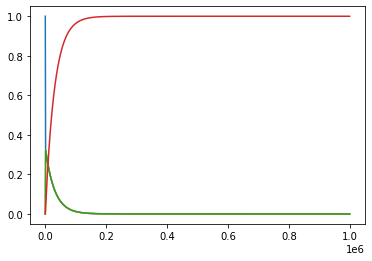

In [46]:
plot_time_profile(conc_sol);

For this model and simulation, plotting on a linear scale does not provide us information about the dyanmics at various time scales. Therefore, we can use the `plot_function` kwarg to change the scale. Let us keep a linear scale on the y-axis, but change the x-axis to a logarithmic scale. 

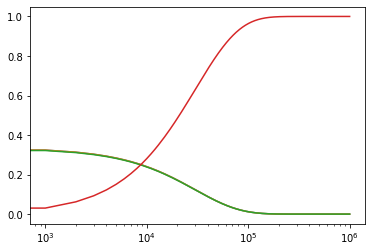

In [47]:
plot_time_profile(conc_sol, plot_function="semilogx");

The `observable` argument allows one to specify particular solutions from the solution profile to observe while filtering out all other solutions. For example, only the solutions for $x_1$ and $x_2$ can be observed by setting observable to an list of these two keys in the solution profile. 

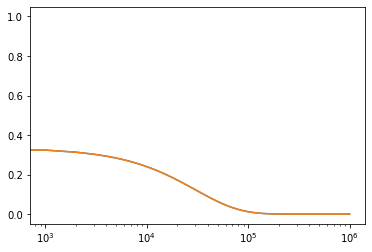

In [48]:
plot_time_profile(conc_sol, observable=["x1", "x2"], 
                  plot_function="semilogx");

Though the dynamic behavior is clear, the above plots do not provide any other information. Let us add axes labels, a title, and a legend to the plot.

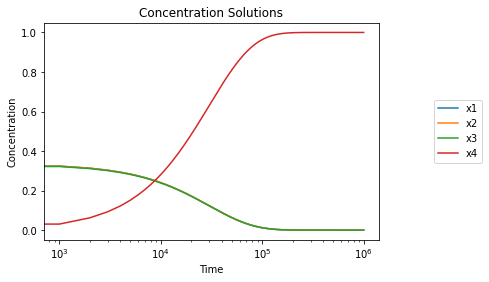

In [49]:
plot_time_profile(
    conc_sol, legend="right outside", plot_function="semilogx",
    xlabel="Time", ylabel="Concentration", 
    title=("Concentration Solutions", {"size": "large"}));

#### Draw phase portraits
Plotting the dynamic responses against one another is also straightforward by using the `plot_phase_portrait` function:

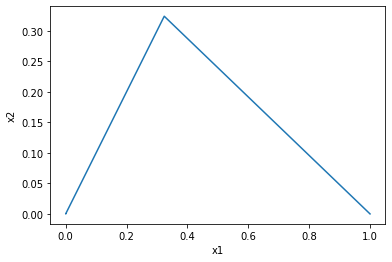

In [50]:
plot_phase_portrait(conc_sol, x="x1", y="x2",
                    xlabel="x1", ylabel="x2");

$x_1$ vs $x_2$: note that you can use the `annotate_time_points` argument to highlight particular time points of interest. This argument can be utilized either by providing iterable of time points of interest. The `annotate_time_points_color` can be used to set the color of the time points. To use color to distinguish time points, the number of colors should equal the number of time points specified.

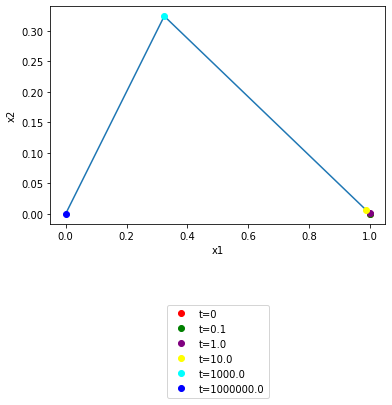

In [51]:
plot_phase_portrait(
    conc_sol, x="x1", y="x2", xlabel="x1", ylabel="x2",
    annotate_time_points=[t0, 1e-1, 1e0, 1e1, 1e3, tf],
    annotate_time_points_color= [
        "red", "green", "purple", "yellow", "cyan", "blue"],
    annotate_time_points_legend="lower outside");

All pairwise phase portraits can be generated and viewed at once in a tiled format using the `plot_tiled_phase_portrait` function:

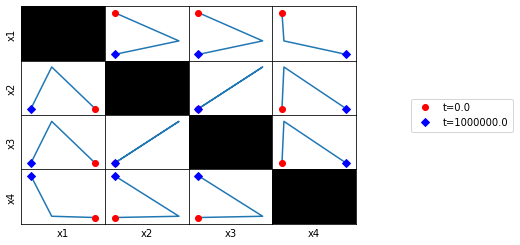

In [52]:
plot_tiled_phase_portraits(conc_sol,
                           annotate_time_points_legend="right outside");

This method is particularly useful for looking at correlations at various time scales. For example, looking at the overall behavior, a fast time timescale of (0, 1), an intermediate timescale of (3, 100), and a slow timescale of (300, 10000), we can generate the following:

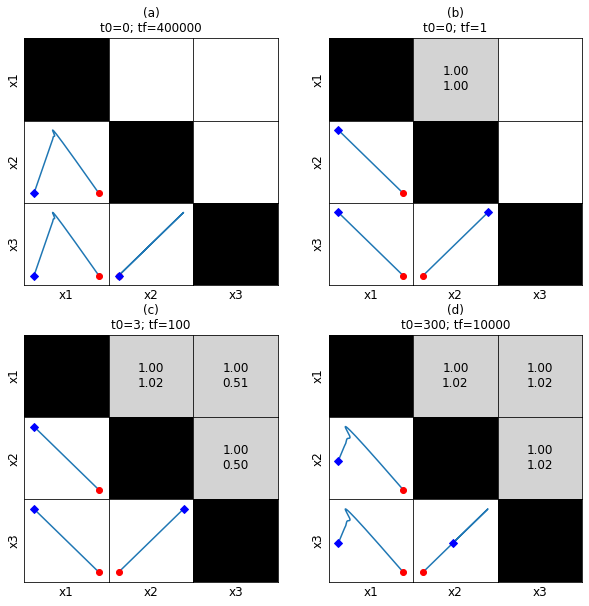

In [53]:
correlations = [
    np.empty((3, 3)).astype(str),
    np.empty((3, 3)).astype(str),
    np.empty((3, 3)).astype(str),
    np.empty((3, 3)).astype(str)]
for entry in correlations:
    entry.fill("")

fmt_str = "{0:.2f}\n{1:.2f}"
correlations[1][0, 1] = fmt_str.format(*[1, 1])
correlations[2][0, 1] = fmt_str.format(*[1, 1.02])
correlations[2][0, 2] = fmt_str.format(*[1, 0.51])
correlations[2][1, 2] = fmt_str.format(*[1, 0.5])
correlations[3][0, 1] = fmt_str.format(*[1, 1.02])
correlations[3][0, 2] = fmt_str.format(*[1, 1.02])
correlations[3][1, 2] = fmt_str.format(*[1, 1.02])

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

times = [(0, 400000), (0, 1), (3, 100), (300, 10000)]
titles = ["{0}\nt0={1}; tf={2}".format(label, *time)
         for label, time in zip(["(a)", "(b)", "(c)", "(d)"], times)]

for i, ax in enumerate(axes.flatten()):
    plot_tiled_phase_portraits(
        conc_sol, observable=["x1", "x2", "x3"], ax=ax,
        plot_tile_placement="lower", additional_data=correlations[i],
        time_vector=np.linspace(*times[i], int(1e6)),
        tile_xlabel_fontdict={"size": "large"},
        tile_ylabel_fontdict={"size": "large"},
        title=titles[i])

### Post process the solution
#### Analyze pool behavior
In order to analyze the behavior of pools, pools can be created using the `MassSolution.make_aggregate_solution` method using the string representation of the pooling formulas. Additional parameters can also be incorporated into the pool formulation using a dictionary input for the `parameters` argument. 

In [54]:
pools = ["x1 - x2", "x1 + x2 - 2*x3", "x1 + x2 + x3"]

for i, equation_str in enumerate(pools):
    pool_id = "p" + str(i + 1)
    conc_sol.make_aggregate_solution(
        pool_id, equation=equation_str, update=True)
    print(pool_id, conc_sol[pool_id])

p1 <scipy.interpolate.interpolate.interp1d object at 0x7faa529aa530>
p2 <scipy.interpolate.interpolate.interp1d object at 0x7faa70d2f590>
p3 <scipy.interpolate.interpolate.interp1d object at 0x7faa8c248710>


This method utilizes the solutions for the individual metabolites over the time range input, and then creates new solutions to represent the behavior of those pools. 

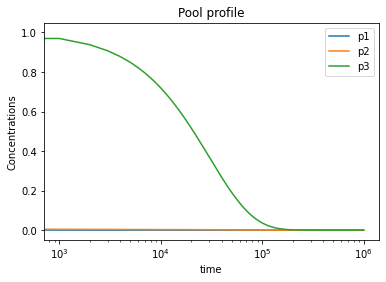

In [55]:
plot_time_profile(
    conc_sol, observable=["p1", "p2", "p3"], legend="best",
    plot_function="semilogx",
    xlabel="time",  ylabel="Concentrations",
    title=("Pool profile", {"size": "large"}));

#### Compute and plot the fluxes
A similar process as above can be utilized to obtain behavior of the net flux through a group of reactions. Note that the `MassSolution.make_aggregate_solution` method relies on the `sympy.sympify` function and can therefore utilize specific methods, such as the absolute value function, in the string as well. 

In [56]:
flux_sol.make_aggregate_solution(
    "v_net", equation='Abs(v1) + Abs(v2) + Abs(v3)', update=True)

{'v_net': <scipy.interpolate.interpolate.interp1d at 0x7faa8dbb0710>}

Again, this method obtains the solutions for the individual fluxes over the time range input, and then creates new solutions to represent the behavior of various flux combinations. 

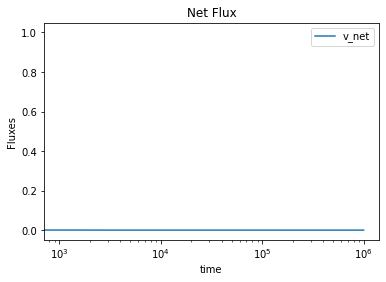

In [57]:
plot_time_profile(
    flux_sol, observable=["v_net"], legend="best",
    plot_function="semilogx",  xlabel="time", ylabel="Fluxes", 
    title=("Net Flux", {"size": "large"}));

#### Plot phase portraits of pools

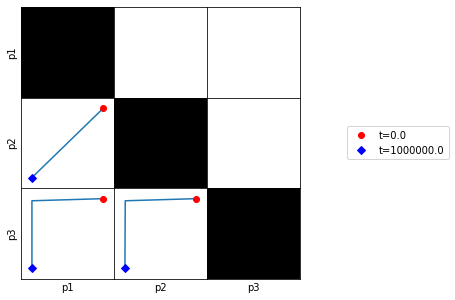

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_tiled_phase_portraits(
    conc_sol, observable=["p1", "p2", "p3"], ax=ax,
    plot_tile_placement="lower",
    annotate_time_points_legend="right outside");

Here, we can see that all of the defined pools are dynamically independent of one another.

## Summary

* Network dynamics are described by dynamic mass balances $(d\textbf{x}/dt = \textbf{Sv}(\textbf{x}; \textbf{k}))$ that are formulated after applying a series of simplifying assumptions 

* To simulate the dynamic mass balances we have to specify the numerical values of the kinetic constants $(\textbf{k})$, the initial conditions $(\textbf{x}_0)$, and any fixed boundary fluxes.

* The equations with the initial conditions can be integrated numerically. 

* The solution contains numerical values for the concentration variables at discrete time points. The solution is graphically displayed as concentrations over time, or in a phase portrait.

* The solution can be post-processed following its initial analysis to bring out special dynamic features of the network. Such features will be described in more detail in the subsequent notebooks.

$\tiny{\text{© B. Ø. Palsson 2011;}\ 
\text{This publication is in copyright.}\\ 
\text{Subject to statutory exception and to the provisions of relevant collective licensing agreements,}\\ \text{no reproduction of any part may take place without the written permission of Cambridge University Press.}}$